# IMAGE TRANSFORMATION (FROM SCRATCH)

## 1. Import libraries

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 2. Initialize global variables

In [ ]:
functionType = ['All', 'Change Brightness', 'Change Contrast', 'Convert To Gray',
                'Flip', 'Blend 2 Grey', 'Blur', 'Insert Circle Frame']
fileOutType = '.png'
maxKernelSize = 10
defaultFileName = 'lena.jpg'
FlipType = ['horizontal', 'vertical']


## 3. Read input photo
- Pass photo into program
- Convert raw data to photo pixel matrix  
**Note**: If photo path is invalid, program will read defaul image automatically.

In [ ]:
def ImageToMatrix(filename):
    try:
        img = Image.open(filename)
    except Exception as error: 
        print(str(error) + '\nRead default image!')
        img = Image.open(defaultFileName)

    return np.array(img)

## 4. Change brightness

In [ ]:
def ChangeBrightness(imgMatrix, brightness = 128):
    m, n, p = imgMatrix.shape
    res = imgMatrix.copy()
    for i in range(m):
        for j in range(n):
            for k in range(p):
                color = imgMatrix[i, j, k]
                color += brightness
                color = min(color, 255)
                color = max(color, 0)
                res[i, j, k] = color

    return res

## 5. Change constrast

In [ ]:
def ChangeContrast(imgMatrix, contrast = -128):
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    res = imgMatrix.copy()
    for i in range(len(imgMatrix)):
        for j in range(len(imgMatrix[i])):
            for k in range(len(imgMatrix[i, j])):
                color = imgMatrix[i, j, k]
                color += int(factor * (color.astype(float) - 128) + 128)
                color = min(color, 255)
                color = max(color, 0)
                res[i, j, k] = color

    return res

## 6. Convert photo to gray photo

In [ ]:
def ConvertRGBtoGrey(imgMatrix):
    R = imgMatrix[:, :, 0]
    G = imgMatrix[:, :, 1]
    B = imgMatrix[:, :, 2]

    return (0.2989 * R + 0.5870 * G + 0.1140 * B).astype('uint8')

## 7. Flip:

In [ ]:
def FlipImage(imgMatrix, type=1):
    m, n, p = imgMatrix.shape
    res = imgMatrix.copy()
    if FlipType[type] == 'vertical':
        for j in range(int(n / 2)):
            tmp = res[:, j].copy()
            res[:, j] = res[:, n - j - 1]
            res[:, n - j - 1] = tmp
    if FlipType[type] == 'horizontal':
        for i in range(int(m / 2)):
            tmp = res[i, :].copy()
            res[i, :] = res[m - i - 1, :]
            res[m - i - 1, :] = tmp
    return res

## 8. Stack 2 photos (gray photos):

In [ ]:
def StackImage(imgMatrix1, imgMatrix2, alpha = 0.5):
    matrix1 = imgMatrix1.astype(float)
    matrix2 = imgMatrix2.astype(float)

    return (matrix1 * alpha + matrix2 * (1 - alpha)).astype('uint8')

## 9. blur photo (BoxBlur algorithm):

In [ ]:
def BoxBlur(imgMatrix, edgeSize=1):
    res = imgMatrix.copy()
    m, n, p = imgMatrix.shape
    kernel = (2 * edgeSize + 1) ** 2
    for i in range(edgeSize, m - edgeSize):
        for j in range(edgeSize, n - edgeSize):
            sum_pixels = np.zeros(3)
            for k, l in [(k, l) for l in range(j - edgeSize, j + edgeSize + 1) for k in range(i - edgeSize, i + edgeSize + 1)]:
                sum_pixels += imgMatrix[k, l]
            res[i, j] = np.floor(sum_pixels / kernel)

    return res

## 10. Insert circle frame:

In [ ]:
def CropToCircle(imgMatrix):
    m, n, p = imgMatrix.shape
    radius = min(m, n) / 2
    x, y = (m - 1) / 2, (n - 1) / 2
    mask = np.array([[[0, 0, 0] if(np.sqrt((i - x) ** 2 + (j - y) ** 2) > radius) else [1,1,1] for j in range(n)] for i in range(m)])
    res = imgMatrix * mask
    return res 

## Ultility function and main program:

In [ ]:
def getFileName(path):
    return (path.split('\\')[-1]).split('.')[0]

In [ ]:
def ExportFile(res, choice, *args):
    outName = ''
    for i in range(len(args)):
        outName += getFileName(args[i])
        if i + 1 < len(args): outName += '_'

    try:
        Image.fromarray(res.astype('uint8')).save(functionType[choice].replace(' ','') + '_' + outName + fileOutType)
    except Exception as error:
        print(error)
        print('Export ' + functionType[choice] + ' unsuccessfully!')
    else:
        print('Export ' + functionType[choice] + ' Successfully!')

FUNCTION:
	0. All
	1. Change Brightness
	2. Change Contrast
	3. Convert To Gray
	4. Flip
	5. Blend 2 Grey
	6. Blur
	7. Insert Circle Frame
-----Change Brightness-----
Export Change Brightness Successfully!
-----Change Contrast-----
Export Change Contrast Successfully!
-----Convert Image to Grey Image-----
Export Convert To Gray Successfully!
-----Horizontal Flip-----
Export Flip Successfully!
-----Vertical Flip-----
Export Flip Successfully!
-----Blend 2 Grey Image-----
Export Blend 2 Grey Successfully!
-----Blur Image-----
Export Blur Successfully!
-----Insert Circle Frame-----
Export Insert Circle Frame Successfully!


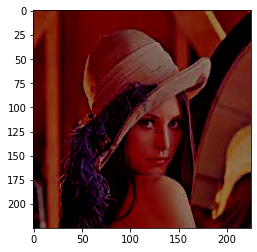

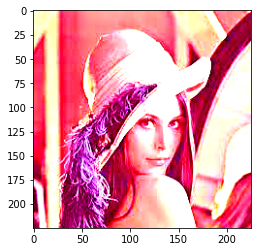

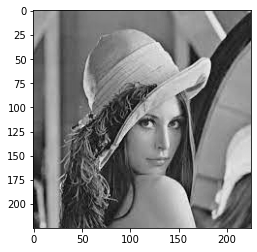

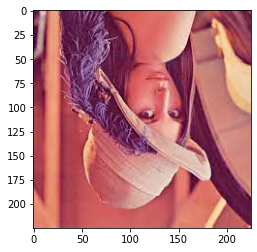

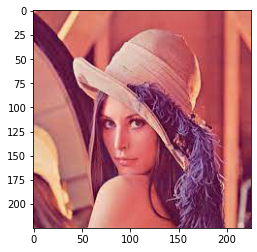

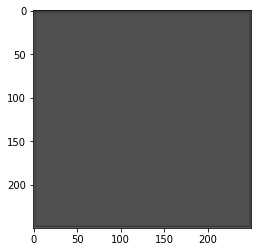

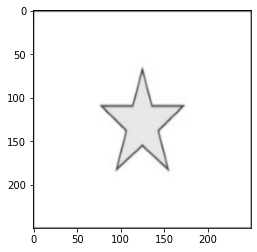

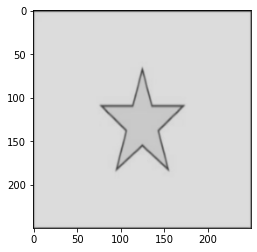

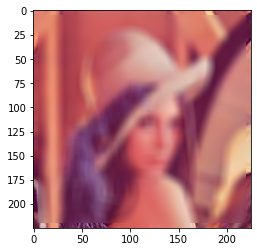

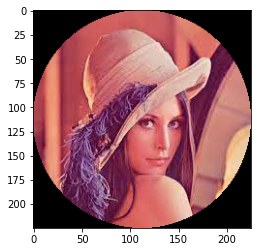

In [ ]:
def main():
    # Step 1: Select function
    print('FUNCTION:')
    for idx, type in enumerate(functionType):
        print('\t', idx, '. ', type, sep='')

    try:
        choice = int(input('YOUR CHOICE:'))
    except Exception as error:
        print(error)
        return
    else:
        if choice > 7 or choice < 0:
            print('Choice is not exist!')
            return

    # Step 2: Enter image
    if choice == 5:
        try:
            fname1 = input('Enter first image path: ')
            fname2 = input('Enter second image path: ')
            imgMatrix1 = ImageToMatrix(fname1)
            imgMatrix2 = ImageToMatrix(fname2)
        except Exception as error:
            print(error)
            return
    else:
        fname = input('Enter image path:')
        try:
            imgMatrix = ImageToMatrix(fname)
        except Exception as error:
            print(error)
            return
    
    # Step 3: Implement function and export file
    if choice == 1:
        brightness = np.clip(int(input('Enter brightness: ')), -255, 255)
        res = ChangeBrightness(imgMatrix, brightness)
        ExportFile(res, 1, fname)
        plt.imshow(res)

    elif choice == 2:
        contrast = np.clip(int(input('Enter contrast: ')), -255, 255)
        res = ChangeContrast(imgMatrix, contrast)
        ExportFile(res, 2, fname)
        plt.imshow(res)
    
    elif choice == 3:
        res = ConvertRGBtoGrey(imgMatrix)
        ExportFile(res, 3, fname)
        plt.imshow(res)

    elif choice == 4:
        print('Flip type: ')
        for idx, flip in enumerate(FlipType): print('\t', idx, '. ', flip, sep='')
        type = np.clip(int(input('Your choice: ')), 0, 1)
        res = FlipImage(imgMatrix, type)
        ExportFile(res, 4, FlipType[type], fname)
        plt.imshow(res)
    
    elif choice == 5:
        alpha = np.clip(float(input("Alpha cofficient (0 <= alpha <= 1): ")), 0, 1)
        res = StackImage(imgMatrix1, imgMatrix2, alpha)
        ExportFile(res, 5, fname1, fname2)
        plt.figure()
        plt.imshow(imgMatrix1)
        plt.figure()
        plt.imshow(imgMatrix2)
        plt.figure()
        plt.imshow(res)

    elif choice == 6:
        size = int(np.clip(int(input('{n --> kernel size = (2 * n) ^ 2)}, n = ')), 1, 10))
        res = BoxBlur(imgMatrix, size)
        ExportFile(res, 6, fname)
        plt.imshow(res)

    elif choice == 7:
        res = CropToCircle(imgMatrix)
        ExportFile(res, 7, fname)
        plt.imshow(res)

    else:
        print('-----Change Brightness-----')
        brightness = np.clip(int(input('Enter brightness: ')), -255, 255)
        res = ChangeBrightness(imgMatrix, brightness)
        ExportFile(res, 1, fname)
        plt.figure()
        plt.imshow(res)

        print('-----Change Contrast-----')
        contrast = np.clip(int(input('Enter contrast: ')), -255, 255)
        res = ChangeContrast(imgMatrix, contrast)
        ExportFile(res, 2, fname)
        plt.figure()
        plt.imshow(res)

        print('-----Convert Image to Grey Image-----')
        res = ConvertRGBtoGrey(imgMatrix)
        ExportFile(res, 3, fname)
        plt.figure()
        plt.imshow(res, cmap='gray')

        print('-----Horizontal Flip-----')
        res = FlipImage(imgMatrix, 0)
        ExportFile(res, 4, FlipType[0], fname)
        plt.figure()
        plt.imshow(res)

        print('-----Vertical Flip-----')
        res = FlipImage(imgMatrix, 1)
        ExportFile(res, 4, FlipType[1], fname)
        plt.figure()
        plt.imshow(res)

        print('-----Blend 2 Grey Image-----')
        try:
            fname1 = input('Enter first image path: ')
            fname2 = input('Enter second image path: ')
            imgMatrix1 = ImageToMatrix(fname1)
            imgMatrix2 = ImageToMatrix(fname2)
        except Exception as error:
            print(error)
            return
        alpha = np.clip(float(input("Alpha cofficient (0 <= alpha <= 1): ")), 0, 1)
        res = StackImage(imgMatrix1, imgMatrix2, alpha)
        ExportFile(res, 5, fname1, fname2)
        plt.figure()
        plt.imshow(imgMatrix1)
        plt.figure()
        plt.imshow(imgMatrix2)
        plt.figure()
        plt.imshow(res)

        print('-----Blur Image-----')
        size = np.clip(int(input('{n --> kernel size = (2 * n) ^ 2)}, n = ')), 1, maxKernelSize)
        res = BoxBlur(imgMatrix, size)
        ExportFile(res, 6, fname)
        plt.figure()
        plt.imshow(res)
        
        print('-----Insert Circle Frame-----')
        res = CropToCircle(imgMatrix)
        ExportFile(res, 7, fname)
        plt.figure()
        plt.imshow(res)
    
main()
